In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [139]:
from pathlib import Path
from pandas.plotting import scatter_matrix
import hvplot.pandas
from tensorflow import keras
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Load the required packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
# instatiatiing a small covnet

# Importing all necessary libraries
from tensorflow.keras import layers
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras import models
%matplotlib inline
import numpy as np
import datetime
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.datasets import make_blobs
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn import utils
from PIL import Image
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 1000)

In [140]:
class_names = [ 'Gendje', 'Kazak', 'Kuba','Qashaqai']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (575, 575)

In [141]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['../pic_file/Data/Train_dir', '../pic_file/Data/Test_dir']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [142]:
(train_images, train_labels), (test_images, test_labels) = load_data()


Loading ../pic_file/Data/Train_dir


100%|██████████| 12/12 [00:00<00:00, 18.73it/s]


Loading ../pic_file/Data/Test_dir


100%|██████████| 4/4 [00:00<00:00, 16.53it/s]


In [143]:
train_images = train_images / 575.0 
test_images = test_images / 575.0

n_train = train_labels.shape[0]
n_test = test_labels.shape[0]


print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))
print ("Each class and coresponding label: {}".format(class_names_label))


Number of training examples: 48
Number of testing examples: 16
Each image is of size: (575, 575)
Each class and coresponding label: {'Gendje': 0, 'Kazak': 1, 'Kuba': 2, 'Qashaqai': 3}


In [144]:
class_names

['Gendje', 'Kazak', 'Kuba', 'Qashaqai']

In [145]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure(figsize=(12,7))
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()
    


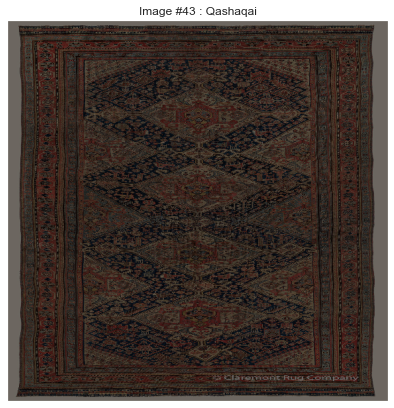

In [146]:
display_random_image(class_names, train_images, train_labels)


ValueError: num must be 1 <= num <= 16, not 17

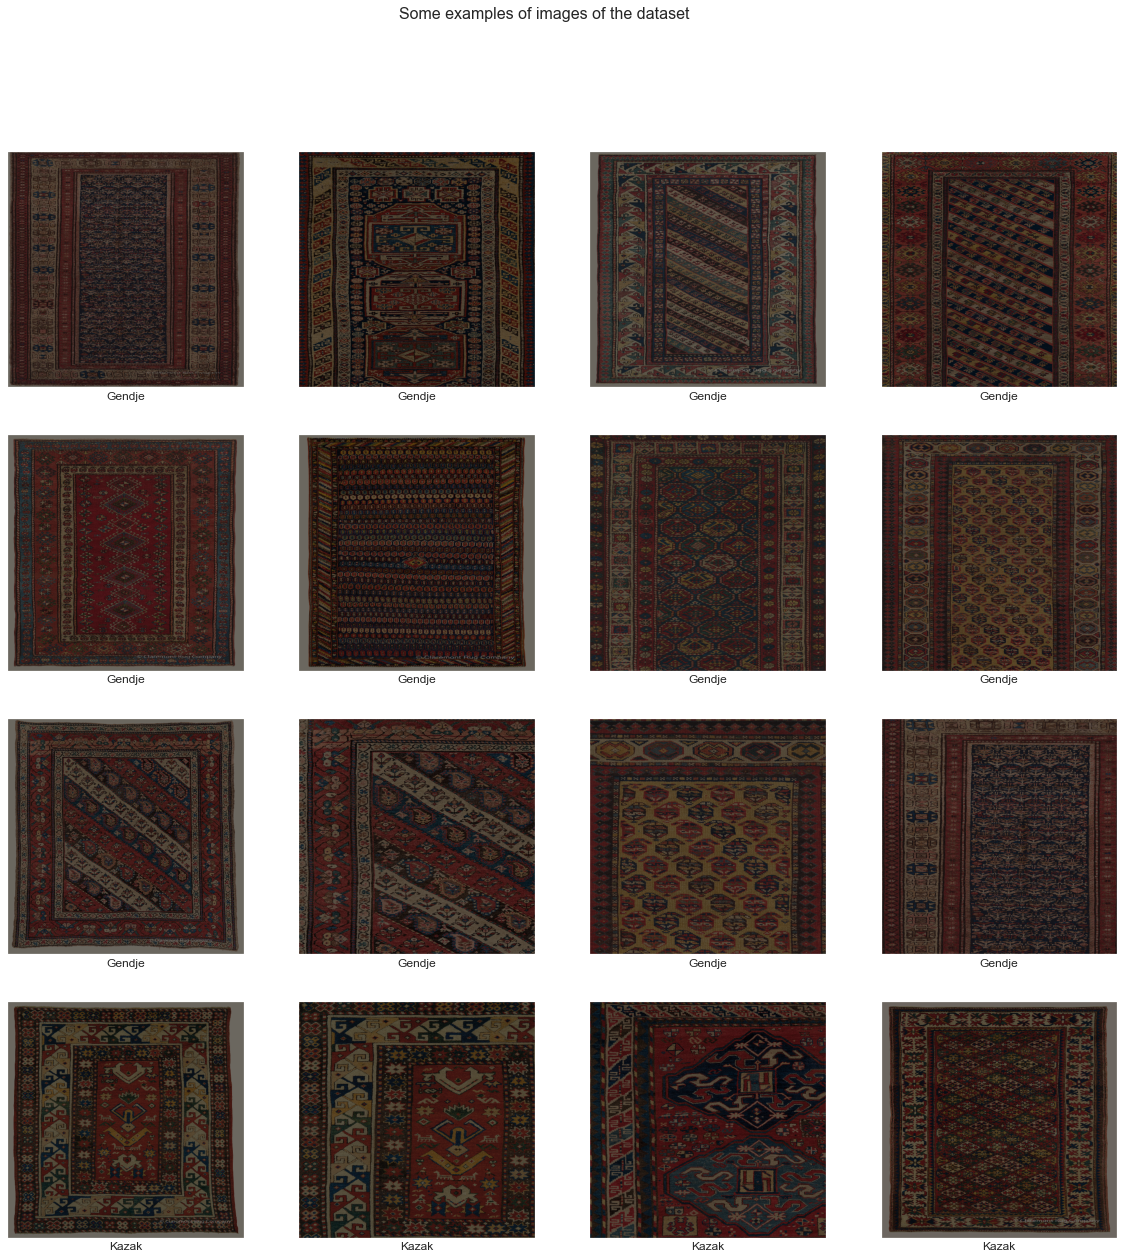

In [147]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(20,20))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(len(images)):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()
    
display_examples(class_names, train_images, train_labels)

In [148]:
modelz = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (5, 5), activation = 'relu', input_shape = (575, 575, 3)), 
    tf.keras.layers.Conv2D(82, (3, 3), activation = 'relu'),     
    tf.keras.layers.Conv2D(116, (3, 3), activation = 'relu'),
    
    
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(136, (2, 2), activation = 'relu'),
    tf.keras.layers.Conv2D(136, (2, 2), activation = 'relu'),
    tf.keras.layers.Conv2D(136, (2, 2), activation = 'relu'),
    
    tf.keras.layers.MaxPooling2D(2,2),
    
    

    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(25, activation=tf.nn.relu),
    
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

In [149]:
modelz.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_105 (Conv2D)         (None, 571, 571, 64)      4864      
                                                                 
 conv2d_106 (Conv2D)         (None, 569, 569, 82)      47314     
                                                                 
 conv2d_107 (Conv2D)         (None, 567, 567, 116)     85724     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 283, 283, 116)    0         
 g2D)                                                            
                                                                 
 conv2d_108 (Conv2D)         (None, 282, 282, 136)     63240     
                                                                 
 conv2d_109 (Conv2D)         (None, 281, 281, 136)     74120     
                                                     

In [150]:
modelz.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [151]:
history = modelz.fit(train_images, train_labels, batch_size=16, epochs=10)

Epoch 1/10
3/3 [==============================] - 89s 29s/step - loss: 14.0968 - accuracy: 0.3125
Epoch 2/10
3/3 [==============================] - 87s 29s/step - loss: 1.4205 - accuracy: 0.2917
Epoch 3/10
3/3 [==============================] - 85s 29s/step - loss: 1.4247 - accuracy: 0.2083
Epoch 4/10
3/3 [==============================] - 85s 28s/step - loss: 1.3710 - accuracy: 0.3125
Epoch 5/10
3/3 [==============================] - 77s 26s/step - loss: 1.4969 - accuracy: 0.2083
Epoch 6/10
3/3 [==============================] - 77s 26s/step - loss: 1.4025 - accuracy: 0.2708
Epoch 7/10
3/3 [==============================] - 79s 26s/step - loss: 1.3858 - accuracy: 0.2708
Epoch 8/10
3/3 [==============================] - 2562s 1268s/step - loss: 1.3864 - accuracy: 0.2500
Epoch 9/10
2/3 [===================>..........] - ETA: 26s - loss: 1.3852 - accuracy: 0.3125 

In [ ]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

In [ ]:
display(plot_accuracy_loss(history))


display(test_loss = modelz.evaluate(test_images, test_labels))


In [ ]:
predictions = modelz.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [ ]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(20,20))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(len(images)):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

In [ ]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

In [ ]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)


In [ ]:
def print_cor_labeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of corectly images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 1)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

In [ ]:
print_cor_labeled_images(class_names, test_images, test_labels, pred_labels)

In [ ]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 10)
plt.show()

In [ ]:
hidden1 = modelz.layers[0]

In [ ]:
weights,biases = hidden1.get_weights()

In [ ]:
modelz.predict(test_images) *10

In [ ]:
score = modelz.predict(test_images)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
predict=modelz.predict(test_images)

# predict the class label
y_classes = predict.argmax(axis=-1)
display(y_classes)
display(predict)

In [ ]:
src_path_train = "data/Train_dir/"
src_path_test = "data/Test_dir/"


batch_size = 12

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1 / 455.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.1)

val_datagen = ImageDataGenerator(rescale=1 / 455.0)

test_datagen = ImageDataGenerator(rescale=1 / 455.0)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    directory=src_path_train,
    target_size=(455, 455),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="sparse",
    subset='training',
    shuffle=True,
    seed=42
)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    directory=src_path_test,
    target_size=(455, 455),
    color_mode="grayscale",
    batch_size=4,
    class_mode=None,
    shuffle=False,
    seed=42
)

In [ ]:
valid_generator = train_datagen.flow_from_directory(
    directory=src_path_train,
    target_size=(455, 455),
    color_mode="grayscale",
    batch_size=1,
    class_mode="sparse",
    subset='validation',
    shuffle=True,
    seed=42
)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(150, (3,3), activation = 'relu', input_shape = (455, 455, 1)), 
    tf.keras.layers.Conv2D(175, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(175, (3,3), activation='relu'),

    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(200, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(200, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(200, (3,3), activation = 'relu'),

    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
historY = model.fit_generator(train_generator,
                    validation_data = train_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=20)


### pd.DataFrame(historY.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 10)
plt.show()


In [ ]:
model.evaluate_generator(valid_generator)

In [ ]:
model.predict_generator(test_generator)

In [ ]:
score = model.evaluate_generator(valid_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
predict=model.predict_generator(valid_generator)
# predict the class label
y_classes = predict.argmax(axis=-1)
y_classes

In [ ]:
class_names = ['Gendje','Kazak', 'Kuba', 'Qashaqai']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (500, 500)

In [ ]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['../pic_file/Data/Train_dir', '../pic_file/Data/Test_dir']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()


In [ ]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

In [ ]:
display(class_names_label)

display(nb_classes)

In [ ]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from tensorflow.keras.utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [ ]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(500,500,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(2,2))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(2,2))
model.add(Layers.Flatten())
#model.add(Layers.Dense(180,activation='relu'))
#model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(4,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
#SVG(model_to_dot(model).create(prog='dot', format='svg'))
#Utils.plot_model(model,to_file='model.png',show_shapes=True)

In [ ]:
trained = model.fit(train_images,train_labels,epochs=30,validation_split=0.20)

In [ ]:
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [ ]:
model.evaluate(test_images,test_labels, verbose=1)
